#**HW 3: Convolutional Neural Networks**

In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the Fashion Minst dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
### Load Data: Fashion MNIST dataset

We will use the Fashion MNIST dataset, a dataset of Zalando's articles. Each sample is a 28x28 pixels grayscale image, associated with a label from 10 classes:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Each pixel intensity is represented by a uint8 (byte) from 0 to 255.
We will divide the dataset in training, validation and test set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of the deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one). Therefore we use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims) to transform each image from a matrix to a 3-dimensional tensor. Finaly we have to normalize the input data.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = (
    fashion_mnist.load_data()) #The dataset is already divede in test and training..

#We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


4423680/4422102 [==============================] - 0s 0us/step


Let's take a look at a sample of the images in the dataset:

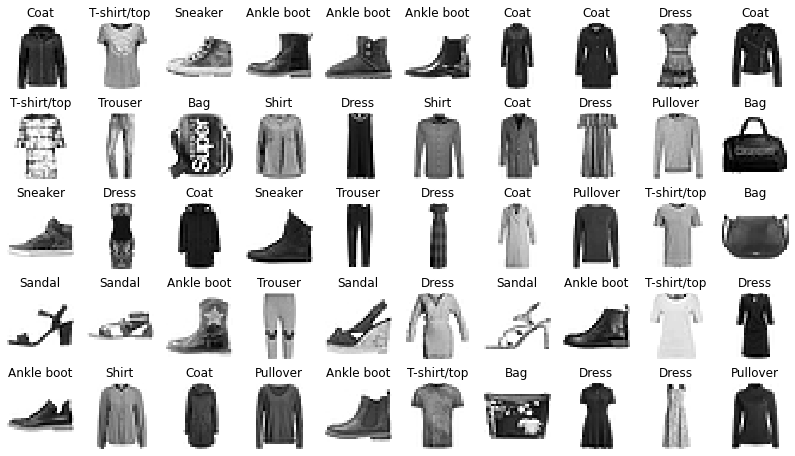

In [ ]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols*1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.show()

### [TO COMPLETE] Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [ ]:
#[TO COMPLETE]: define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#Hint: For each feature (pixel intensity), you must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)



std_train = np.std(X_train, axis=0)
mean_train = np.mean(X_train, axis=0)
X_train = (X_train - mean_train) / std_train#[TO COMPLETE]
X_valid = (X_valid - mean_train) / std_train#[TO COMPLETE]
X_test = (X_test - mean_train) / std_train#[TO COMPLETE]

#Add one dimension to manage the channel
X_train=tf.expand_dims(X_train, 3) 
X_valid=tf.expand_dims(X_valid, 3) 
X_test=tf.expand_dims(X_test,3)

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
# test set

###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])


Print the model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
430/430 [==============================] - 25s 57ms/step - loss: 0.7437 - accuracy: 0.7589 - val_loss: 0.5099 - val_accuracy: 0.8284
Epoch 2/10
430/430 [==============================] - 24s 56ms/step - loss: 0.4780 - accuracy: 0.8361 - val_loss: 0.4431 - val_accuracy: 0.8530
Epoch 3/10
430/430 [==============================] - 24s 57ms/step - loss: 0.4263 - accuracy: 0.8535 - val_loss: 0.4160 - val_accuracy: 0.8588
Epoch 4/10
430/430 [==============================] - 25s 57ms/step - loss: 0.3975 - accuracy: 0.8621 - val_loss: 0.3981 - val_accuracy: 0.8712
Epoch 5/10
430/430 [==============================] - 25s 57ms/step - loss: 0.3772 - accuracy: 0.8693 - val_loss: 0.3764 - val_accuracy: 0.8742
Epoch 6/10
430/430 [==============================] - 25s 57ms/step - loss: 0.3623 - accuracy: 0.8743 - val_loss: 0.3713 - val_accuracy: 0.8772
Epoch 7/10
430/430 [==============================] - 25s 57ms/step - loss: 0.3502 - accuracy: 0.8779 - val_loss: 0.3596 - val_accuracy:

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 2s - loss: 0.3565 - accuracy: 0.8742
accuracy: 87.42%


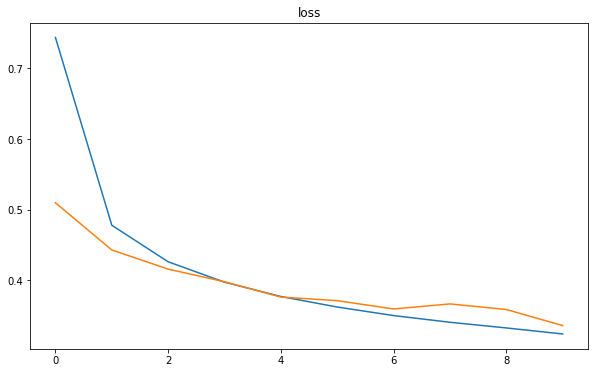

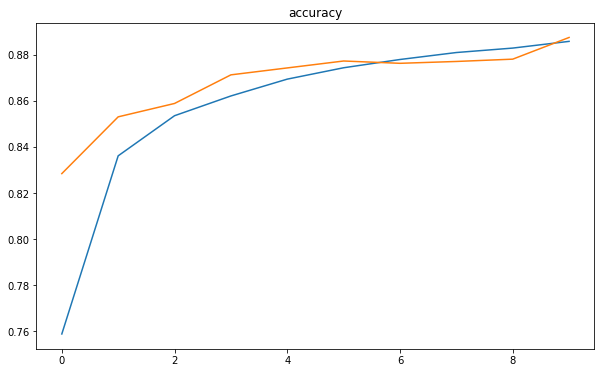

In [ ]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'])
  plt.plot(history.epoch,history.history['val_loss'])
  plt.title('loss')

def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'])
  plt.plot(history.epoch,history.history['val_accuracy'])
  plt.title('accuracy')

plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

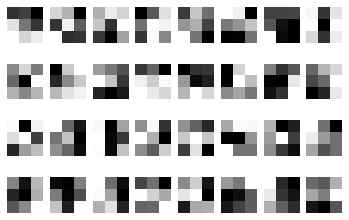

In [ ]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### [TO COMPLETE] Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 16)        2064      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5770      
Total params: 8,154
Trainable params: 8,154
Non-trainable params: 0
____________________________________________________

[TO COMPLETE] Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;

2.   the reasons why the two considered convolutional layers have a different number of parameters.

Answers:

1.   The number of parameters on each layer Conv2D are: output_channels * (input_channels * kernel_size + 1) the 1 is for the bias.

    So for conv2d_1, number of parameter are: 32 * (1 * 9 + 1) = 320$.
    Instead for conv2d_2 they are: 16 * (32 * 4 + 1) = 2064$

2.   The number of parameters in a certain layer is the number of elements that could be learnt and it is different for the two convolutional layers because we want the model to be "deeper", with different learned weights for each different layer.
    


Let's now train our deep CNN.

Epoch 1/10
430/430 [==============================] - 27s 62ms/step - loss: 1.0694 - accuracy: 0.6349 - val_loss: 0.6894 - val_accuracy: 0.7576
Epoch 2/10
430/430 [==============================] - 26s 61ms/step - loss: 0.6193 - accuracy: 0.7754 - val_loss: 0.6033 - val_accuracy: 0.7696
Epoch 3/10
430/430 [==============================] - 26s 62ms/step - loss: 0.5432 - accuracy: 0.8054 - val_loss: 0.4976 - val_accuracy: 0.8284
Epoch 4/10
430/430 [==============================] - 27s 62ms/step - loss: 0.4967 - accuracy: 0.8250 - val_loss: 0.4640 - val_accuracy: 0.8372
Epoch 5/10
430/430 [==============================] - 27s 62ms/step - loss: 0.4690 - accuracy: 0.8354 - val_loss: 0.4569 - val_accuracy: 0.8406
Epoch 6/10
430/430 [==============================] - 27s 62ms/step - loss: 0.4484 - accuracy: 0.8443 - val_loss: 0.4572 - val_accuracy: 0.8410
Epoch 7/10
430/430 [==============================] - 27s 62ms/step - loss: 0.4321 - accuracy: 0.8501 - val_loss: 0.4674 - val_accuracy:

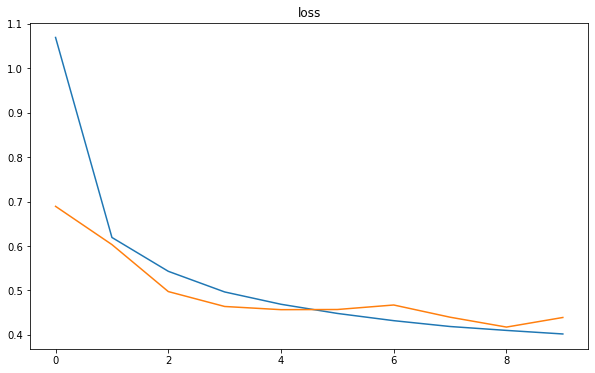

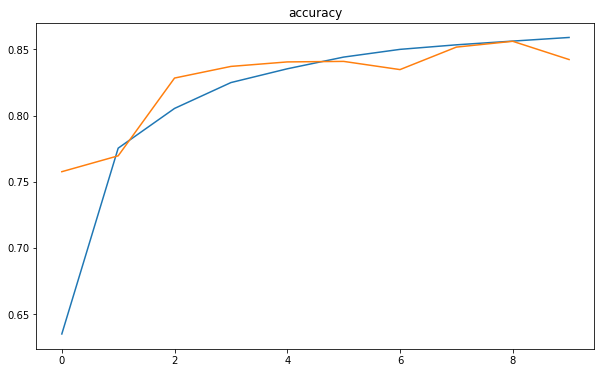

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## [TO COMPLETE] Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**[TO COMPLETE]**: Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

In [ ]:
from tensorflow.keras.optimizers import SGD


model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Dropout(0.25),
    
    keras.layers.Conv2D(filters=64, kernel_size=[3,3], activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=[3,3], activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Dropout(0.25),
    

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(10, activation="softmax")

  ])
# NUM_EPOCHS = 25
# INIT_LR = 1e-2
# BS = 32
# opt = SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / NUM_EPOCHS)

model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
  
print(model.summary())



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 64)       

Epoch 1/25
1719/1719 [==============================] - 172s 100ms/step - loss: 0.7268 - accuracy: 0.7493 - val_loss: 0.3797 - val_accuracy: 0.8644
Epoch 2/25
1719/1719 [==============================] - 172s 100ms/step - loss: 0.4814 - accuracy: 0.8279 - val_loss: 0.3285 - val_accuracy: 0.8836
Epoch 3/25
1719/1719 [==============================] - 171s 99ms/step - loss: 0.4131 - accuracy: 0.8506 - val_loss: 0.2943 - val_accuracy: 0.8936
Epoch 4/25
1719/1719 [==============================] - 172s 100ms/step - loss: 0.3786 - accuracy: 0.8633 - val_loss: 0.2942 - val_accuracy: 0.8922
Epoch 5/25
1719/1719 [==============================] - 172s 100ms/step - loss: 0.3568 - accuracy: 0.8719 - val_loss: 0.2660 - val_accuracy: 0.9074
Epoch 6/25
1719/1719 [==============================] - 171s 99ms/step - loss: 0.3383 - accuracy: 0.8785 - val_loss: 0.2633 - val_accuracy: 0.9060
Epoch 7/25
1719/1719 [==============================] - 172s 100ms/step - loss: 0.3243 - accuracy: 0.8823 - val_lo

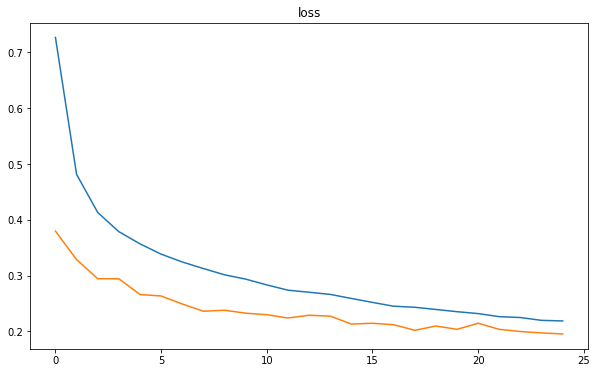

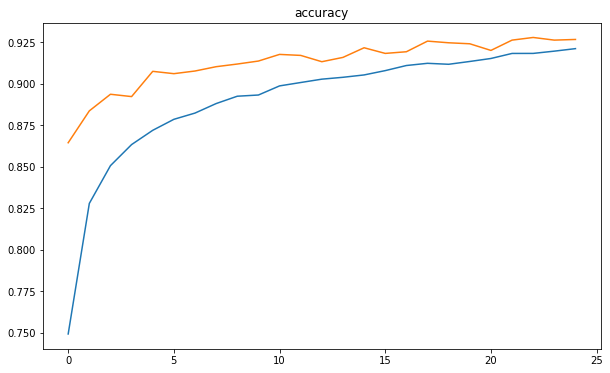

In [ ]:
history = model.fit(X_train, y_train, epochs=25, batch_size=32,validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")




### [TO COMPLETE] Example of tests discussion
The best model that I found ...[TO COMPLETE]


The best model that I found is composed by the following layers:

A convolutional (Conv2D) layer, with 32 filters of size 4x4

A max-pooling (MaxPool2D) layer, which filter size is 2x2

Another convolutional (Conv2D) layer, with 16 filters of size 3x3
A flatten layer,

A dropout layer, whose rate is set to 0.25

A fully-connected (Dense) layer of 512 neurons and with ReLU activation function
Another dropout layer, with rate set to 0.5

The final fully-connected (Dense) layer, with 10 outputs and softmax as activation

The model uses also early stopping, with the maximum number of epochs set to 500 and a patience (number of epochs with no improvement) set to 10.

The achieved accuracy in the test set is 91.91%.

Discussion: Before starting the exercise, I set an accuracy goal: my proposed model should have had at least 91% accuracy. This model is the result of a thought process, which starts from the proposed "Simple CNN" model and passes among the steps described in the next section. I eventually came up with a model that has about 10 times the number of parameter of the starting one (612,986 vs 63,050). However, it offers a 4% performance improvement which, although it might not seems a lot, reaches (and overtakes) the preset accuracy goal.

I modified one parameter each time, starting from number of layers passing through activation function and optimizers and arriving to the batch sizes. Best performances I found were with different optimizer, epochs, activation function and batch size so to obtain my best model I have mediate between them.

I found out that smaller batch sizes and removing maxpool layer caused sawtooth trend on the graph. So in the end i mantained 128 as batch size.

Small batch sizes with bigger number of epoch has slight trend to overfit (loss on train improves while on validation stationate to a value after ~ 10 epochs). Same happened with bigger filters on both convolutionary layers (but in this case accuracy on test set slightly improves in respect to mymodel).

Best optimizers I tested were adam, nadam, adamax and rmsprop.
